In [1]:
from __future__ import print_function
import numpy as np
import argparse
import cv2
import imutils
from matplotlib import pyplot as plt

In [31]:
def resize_image(img, max_coordinate):
    height, width, depth = img.shape
    print(width)
    print(height)
    d = max(width, height)

    if d < max_coordinate:
        if d == width:
            img = imutils.resize(img, width = max_coordinate)
        else:
            img = imutils.resize(img, height = max_coordinate)
    return img

def detect_circles(img, d):
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    # gray = cv2.dilate(gray, None)
    # gray = cv2.erode(gray, None)
    # gray = cv2.erode(gray, None)
#     kernel = np.ones((3,3),np.uint8)
#     opening = cv2.morphologyEx(gray, cv2.MORPH_OPEN,kernel, iterations = 2)
    blur = cv2.medianBlur(gray, 7)
    circles = cv2.HoughCircles(blur, cv2.HOUGH_GRADIENT, 1.3, (int) (d / 10), param1 = 100, param2 = 75,
                               minRadius = (int) (d / 35))
    print("found " + str(circles.shape[1]) + " circle(s)")
    return circles

def draw_circles(img, circles):
    if circles is not None:
        circles = np.uint16(np.around(circles))
        for i, c in enumerate(circles[0, :]):
            cv2.circle(img, (c[0], c[1]), c[2], (255, 0, 0), 10)
    plt.imshow(img)
#     j = j + 1
#     plt.savefig("pic " + str(j) + ".png")

def avg_color(img):
    hsv = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
    avg = np.mean(hsv, axis = (0,1))
    return avg

def h_to_360(h):
    return h * 360

def check_hsv_color(color):
    h = color[0]
    s = color[1]
    v = color[2]
    c = None
#     if v < .1:
#         print("error: too dark")
#         return color
    if .5 < s:
        color = 'golden'
    elif 0 < s <= .5:
        color = 'silver'
    else:
        print(f"error: h = {h_to_360(h)}, s = {s}")
    return color


def get_coin_colors(img, c):
    
    normal = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    
    x, y, radius = int(c[0]), int(c[1]), int(c[2])
    print(x, y, radius)

    center_delta = int(radius / 3.5)
    center = normal[y - center_delta : y + center_delta, x - center_delta : x + center_delta].copy()

    edge_delta = int(radius * .1)
    offset = int(10 / 18 * radius)

    x_from = x - offset - edge_delta
    x_to = x - offset + edge_delta
    y_from = y - offset - edge_delta
    y_to = y - offset + edge_delta

    edge = normal[y_from : y_to, x_from : x_to].copy()

    avg_center = avg_color(center)
    avg_center = [avg_center[0] / 180, avg_center[1] / 255, avg_center[2] / 255]
    avg_edge = avg_color(edge)
    avg_edge = [avg_edge[0] / 180, avg_edge[1] / 255, avg_edge[2] / 255]
    
    print(avg_center)
    print(avg_edge)

    return check_hsv_color(avg_center), check_hsv_color(avg_edge)

#     print(check_hsv_color(avg_center))
#     print(check_hsv_color(avg_edge))
    
# def count_coins(circles):
    
#     radii = []
#     detected_coins = []
    
#     circles = circles[0]
#     for circle in circles:
#         radii.append(circle[2])
#     print(circles)
        
#     min_circle = min(radii)
#     print(min_circle)
#     tolerance = 0.032258
    
#     for circle in circles:
#         current_size = circle[2] / min_circle
#         print(current_size)
#         for coin in coins:
#             potential_size = coins[coin]['size']
#             potential_value = coins[coin]['value']
#             if abs(potential_size - current_size) <= tolerance:
#                 detected_coins.append((circle[0], circle[1], potential_value))
#                 coins[coin]['count'] += 1
#                 print("found " + str(potential_value))
#     return detected_coins

1280
720
found 21 circle(s)
(1406, 2500, 3)
1229 564 114
[0.2952880859375, 0.4889705882352941, 0.824542356004902]
[0.009377869605142333, 0.6555339491168368, 0.7588154269972451]
0
1342 265 126
[0.009890474965706447, 0.8190677196804648, 0.6899903171145001]
[0.013541666666666667, 0.7948937908496732, 0.576266339869281]
1
1192 1035 118
[0.353670543822059, 0.6466591044131151, 0.6148823349358108]
[0.03764921946740128, 0.6395073731972127, 0.6049019607843137]
2
1342 793 104
[0.9674659796538513, 0.6101338276095218, 0.8583758830523887]
[0.9865416666666665, 0.6282941176470589, 0.8627254901960785]
3
1797 944 87
[0.9897786458333333, 0.7655603213507626, 0.5583469498910676]
[0.9766710069444444, 0.7731770833333333, 0.6553768382352941]
4
1645 486 82
[0.0023471959672337742, 0.8543941584195115, 0.607646688164869]
[0.0025173611111111113, 0.8420649509803921, 0.6134037990196078]
5
1550 615 332
[0.5314334351893768, 0.6606445113129, 0.8409531195909781]
[0.011396796245281093, 0.6463638164172925, 0.8377023352959

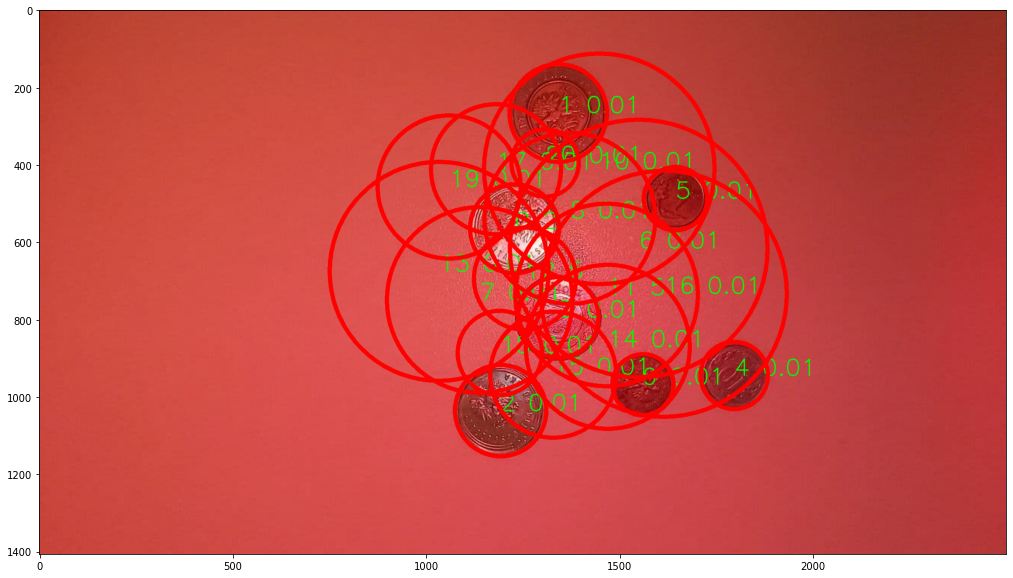

In [32]:
plt.figure(figsize=(20,10))
img = cv2.imread("real/coins 9.jpg")
d = max(img.shape[0], img.shape[1])
# d = 10000
img = resize_image(img, 2500)
coin = detect_circles(img, d)
print(img.shape)

img_gamma = adjust_gamma(img, .7)

value = 0
color = ""

for i, c in enumerate(coin[0, :]):
    center, edge = get_coin_colors(img, c)
    if center == "golden" and edge == "golden":
        value = .01
        color = "gg"
    elif center == "silver" and edge == "golden":
        value = 2
        color = "sg"
    elif center == "golden" and edge == "silver":
        value = 5
        color = "gs"
    elif center == "silver" and edge == "silver":
        value = 0
        color = "ss"
    print(i)
    cv2.putText(img, str(i) + " " + str(value), ((int) (c[0]), (int) (c[1])), cv2.FONT_HERSHEY_SIMPLEX,
                        2, (0, 255, 0), 2, cv2.LINE_AA)

# plt.imshow(center)
# plt.imshow(edge)
draw_circles(cv2.cvtColor(img, cv2.COLOR_BGR2RGB), coin)

In [187]:
plt.figure(figsize=(20,10))

img = cv2.imread("real/coins 5.jpg", cv2.IMREAD_COLOR)

d = max(img.shape[0], img.shape[1])

img = resize_image(img, 2500)

circles = detect_circles(img, d)

normal_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

cs = count_coins(circles)

draw_circles(normal_img, circles, cs)


plt.savefig("pic.jpg")

577
1280
found 1 circle(s)


NameError: name 'count_coins' is not defined

<Figure size 1440x720 with 0 Axes>

In [4]:
coins = {
    "1gr" : {
        "value" : .01,
        "size" : 1,
        "count" : 0,
    },
    "2gr" : {
        "value" : .02,
        "size" : 1.129,
        "count" : 0,
    },
    "5gr" : {
        "value" : .05,
        "size" : 1.258,
        "count" : 0,
    },
    "10gr" : {
        "value" : .1,
        "size" : 1.0645,
        "count" : 0,
    },
    "20gr" : {
        "value" : .2,
        "size" : 1.19355,
        "count" : 0,
    },
    "50gr" : {
        "value" : .5,
        "size" : 1.3226,
        "count" : 0,
    },
    "1zl" : {
        "value" : 1,
        "size" : 1.4839,
        "count" : 0,
    },
    "2zl" : {
        "value" : 2,
        "size" : 1.3871,
        "count" : 0,
    },
    "5zl" : {
        "value" : 5,
        "size" : 1.5484,
        "count" : 0,
    },
}

In [4]:
def linear_stretching(input, lower_stretch_from, upper_stretch_from):

    lower_stretch_to = 0  # lower value of the range to stretch to - output
    upper_stretch_to = 255  # upper value of the range to stretch to - output

    output = (input - lower_stretch_from) * ((upper_stretch_to - lower_stretch_to) / (upper_stretch_from - lower_stretch_from)) + lower_stretch_to

    return output

def gamma_correction(img):
    
    max_value = np.max(img)
    min_value = np.min(img)
    
    print(min_value)
    print(max_value)

    for y in range(len(img)):
        for x in range(len(img[y])):
            img[y][x] = linear_stretching(img[y][x], min_value, max_value)

    return img

def remove_background(img, threshold):
    
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    _, threshed = cv2.threshold(gray, threshold, 255, cv2.THRESH_BINARY_INV)

    kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (11, 11))
    morphed = cv2.morphologyEx(threshed, cv2.MORPH_CLOSE, kernel)

    cnts = cv2.findContours(morphed, 
                            cv2.RETR_EXTERNAL,
                            cv2.CHAIN_APPROX_SIMPLE)[0]

    cnt = sorted(cnts, key=cv2.contourArea)[-1]

    mask = cv2.drawContours(threshed, cnt, 0, (0, 255, 0), 0)
    masked_data = cv2.bitwise_and(img, img, mask=mask)

    x, y, w, h = cv2.boundingRect(cnt)
    dst = masked_data[y: y + h, x: x + w]

    dst_gray = cv2.cvtColor(dst, cv2.COLOR_BGR2GRAY)
    _, alpha = cv2.threshold(dst_gray, 0, 255, cv2.THRESH_BINARY)
    b, g, r = cv2.split(dst)

    rgba = [r, g, b, alpha]
    dst = cv2.merge(rgba, 4)

    return dst


def adjust_gamma(image, gamma=1.0):
    invGamma = 1.0 / gamma
    table = np.array([((i / 255.0) ** invGamma) * 255
        for i in np.arange(0, 256)]).astype("uint8")
    return cv2.LUT(image, table)
j = 0